# Comparando Imagenes
## Mitsiu Alejandro Carreño Sarabia 

(272, 606, 3)


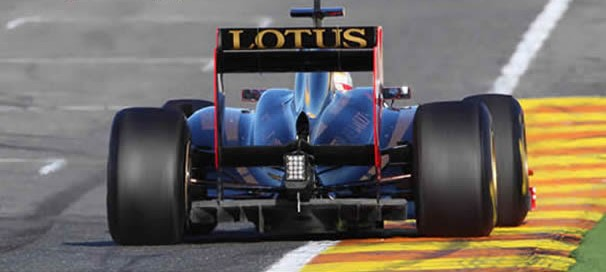

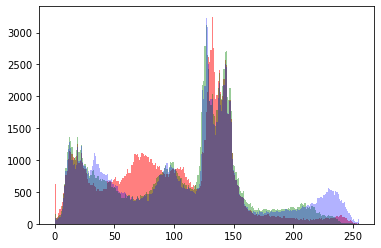

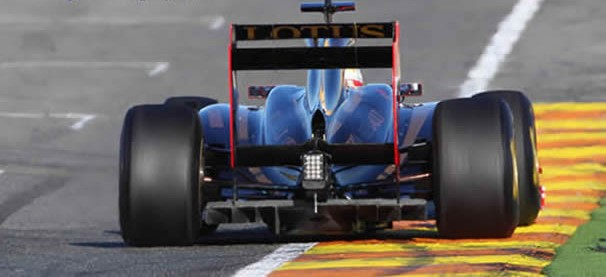

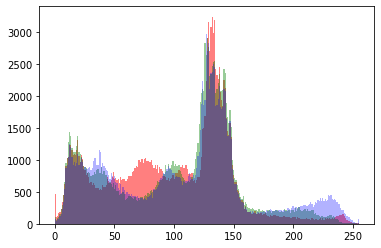

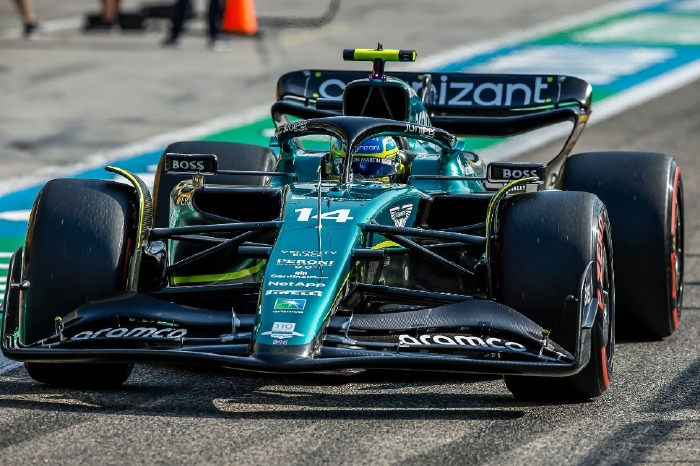

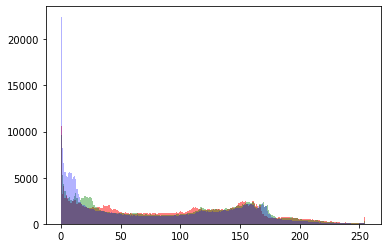

In [8]:
#Importamos las bibliotecas necesarias para procesar las imagenes
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import skimage.feature as feature


def plot_histogram(image):
  '''
  Descripción: Crear un histograma de color para rojo, verde y azul según una imágen dada
  Input: image Una matriz de dimensiones [(px alto), (px ancho), (3)]
  Output: Histograma 
  '''
  for (i, value) in enumerate(['red', 'green', 'blue']):
    plt.hist(
      image[:,:,i].flatten(),
      bins=256,
      density=False,
      color=value,
      alpha=0.5 - i*0.1
    )
 
  plt.show()
  

img1 = "img1.jpg"
img2 = "img2.jpg"
img3 = "img3.jpg"

#Cargamos nuestas imagenes
img1 = cv2.imread(img1)
img2 = cv2.imread(img2)
img3 = cv2.imread(img3)

# Para cada imagen, la mostramos y creamos su histograma
for img in [img1, img2, img3]:
  cv2_imshow(img)
  plot_histogram(img)




Se puede apreciar entre los dos primeros histogramas, que aunque son imagenes distintas, (aparte de las diferencias obvias de tener el alerón trasero abierto/cerrado, en la segunda imagen el coche se encuentra ligeramente más cargado a la derecha respecto al apex) ambos histogramas son muy similiares, y hace sentido ya que ambas fotos se tomaron desde el mismo lugar, con condiciones de iluminación muy similares. En cambio el tercer histograma, que parte de un coche distinto, en un angulo distinto, tiene colores concentrados en un rango de 0 a 175 del eje x, sin claros despuntes excepto al inicio de azul, que corresponde a colores azules obscuros 

In [11]:
# Importe la librería pprint que facilita imprimir diccionarios de manera legible, dando saltos de línea despues de cada llave, valor
import pprint

# Cree un gran diccionario para procesar las tres imagenes de manera secuencial, dentro de cada lista, el elemento 0 corresponde a la primer imagen, el elemento 1 a la segunda, etc
gray_exploration = {
    "grays": [],
    "graycoms": [],
    "grayvalues": []
}

gray_props = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

for i, img in enumerate([img1, img2, img3]):
  # Cambiamos cada imagen a su representación en escala de grises para analizarla
  gray_exploration["grays"].append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

  # Analizamos la imagen en escala de grises para evaluar la interacción entre vecinos de cada pixel 
  gray_exploration["graycoms"].append(feature.graycomatrix(gray_exploration["grays"][i], [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256))

  gray_values = {}
  
  for prop in gray_props:
    # Obtenemos distintos valores de interes como contraste, homogeneidad, energia, correlación
    gray_values[prop] = feature.graycoprops(gray_exploration["graycoms"][i], prop)
  gray_exploration["grayvalues"].append(gray_values)

  print(f"Gray information on image {i}")
  pprint.pprint(gray_values)

print("Comparing images by prop:")
for prop in gray_props:
  print(f"Comparing {prop}")
  print("Image 1 vs Image 2")
  print(gray_exploration["grayvalues"][0][prop] - gray_exploration["grayvalues"][1][prop])
  print("Image 1 vs Image 3")
  print(gray_exploration["grayvalues"][0][prop] - gray_exploration["grayvalues"][2][prop])

Gray information on image 0
{'ASM': array([[0.00192933, 0.00085375, 0.00104996, 0.00087917]]),
 'contrast': array([[ 89.55162859, 223.66951298, 137.8111444 , 211.1155012 ]]),
 'correlation': array([[0.98501528, 0.96262575, 0.97695988, 0.96472456]]),
 'dissimilarity': array([[3.8526981 , 7.62997774, 5.67127617, 7.2749352 ]]),
 'energy': array([[0.04392409, 0.02921892, 0.03240311, 0.02965078]]),
 'homogeneity': array([[0.49826771, 0.29284013, 0.347315  , 0.30036504]])}
Gray information on image 1
{'ASM': array([[0.00197175, 0.0008854 , 0.00111073, 0.0009124 ]]),
 'contrast': array([[ 67.50706806, 196.13597437, 128.07639786, 178.44081327]]),
 'correlation': array([[0.98800599, 0.96518124, 0.97724851, 0.96832229]]),
 'dissimilarity': array([[3.51215204, 7.19000479, 5.4575501 , 6.85833633]]),
 'energy': array([[0.04440444, 0.02975564, 0.03332765, 0.03020588]]),
 'homogeneity': array([[0.50060638, 0.30310952, 0.36210346, 0.30800147]])}
Gray information on image 2
{'ASM': array([[0.00105163, 